In [1]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools
%matplotlib inline

nr of spikes: 0


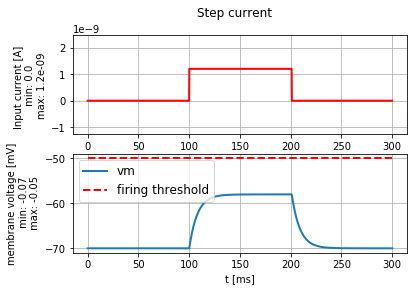

nr of spikes: 5


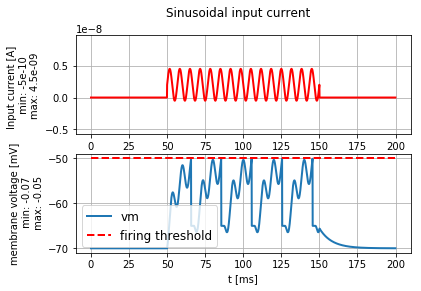

In [2]:
LIF.getting_started()

In [3]:
LIF.print_default_parameters()

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


Note that you can change all parameter of the LIF neuron by using the named parameters of the function simulate_LIF_neuron(). If you do not specify any parameter, the following default values are used:

V_REST = -70* b2.mV

V_RESET = -65* b2.mV

FIRING_THRESHOLD = -50* b2.mV

MEMBRANE_RESISTANCE = 10. * b2.Mohm

MEMBRANE_TIME_SCALE = 8. * b2.ms

ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

## 2.1. Exercise: minimal current

In the absence of an input current, a LIF neuron has a constant membrane voltage vm=v_rest. If an input current drives vm above the firing threshold, a spike is generated. Then, vm is reset to v_reset and the neuron ignores any input during the refractroy period.

### 2.1.1. Question: minimal current (calculation)

For the default neuron parameters (see above) compute the minimal amplitude i_min of a step current to elicitate a spike. You can access these default values in your code and do the calculation with correct units:

Answer:

The relationship between the amplitude of the step current and the resulting new level of neuron potentail is calculated by:

$$
u(t) = u_\text{rest} + R I_0 \exp(-(t-t_0)/\tau)
$$

where for $t \rightarrow \infty$, $u(t) \rightarrow u_\text{rest} + RI_0$

Therefore, denoting the firing threshold as $\theta$, and setting $u(t) = \theta$, and can rearrange the equation to get an expression for $I_0$

\begin{align*}
\theta &= u_\text{rest} + R I_0 \\
I_0    &= \frac{\theta - u_\text{rest}}{R}
\end{align*}

In [4]:
i_min = (LIF.FIRING_THRESHOLD - LIF.V_REST) / LIF.MEMBRANE_RESISTANCE
i_min

2. * namp

### 2.1.2. Question: minimal current (simulation)

Use the value i_min you’ve computed and verify your result: inject a step current of amplitude i_min for 100ms into the LIF neuron and plot the membrane voltage. Vm should approach the firing threshold but not fire. We have implemented a couple of helper functions to solve this task. Use this code block, but make sure you understand it and you’ve read the docs of the functions LIF.simulate_LIF_neuron(), input_factory.get_step_current() and plot_tools.plot_voltage_and_current_traces().

nr of spikes: 0


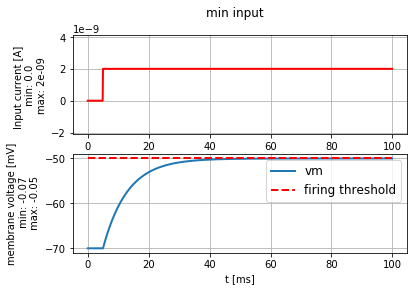

In [5]:
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms, amplitude= i_min)  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time=100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)

print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

In [6]:
?LIF.simulate_LIF_neuron()

In [7]:
?input_factory.get_step_current()

In [8]:
?plot_tools.plot_voltage_and_current_traces()

## 2.2. Exercise: f-I Curve
For a constant input current I, a LIF neuron fires regularly with firing frequency f. If the current is to small (I < I_min) f is 0Hz; for larger I the rate increases. A neuron’s firing-rate versus input-amplitude relationship is visualized in an “f-I curve”.

### 2.2.1. Question: f-I Curve and refractoryness
We now study the f-I curve for a neuron with a refractory period of 3ms (see LIF.simulate_LIF_neuron() to learn how to set a refractory period).

1. Sketch the f-I curve you expect to see
2. What is the maximum rate at which this neuron can fire?
3. Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.

In [9]:
def plot_ficurve(i, time=500, refractory_period=3 * b2.ms):
    step_current = input_factory.get_step_current(t_start=0, t_end=time, unit_time=b2.ms, amplitude= i) 

    # run the LIF model.
    # Note: As we do not specify any model parameters, the simulation runs with the default values
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(
        input_current=step_current, simulation_time=time * b2.ms, abs_refractory_period=refractory_period)

    # plot I and vm
    plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)

    print("nr of spikes: {}".format(spike_monitor.count[0]))

In [10]:
# The arbitrarily large current would make the neuron firing immediately
refractory_period=3 * b2.ms
max_firing_rate = 1 / refractory_period
max_firing_rate

0.33333333 * khertz

nr of spikes: 0


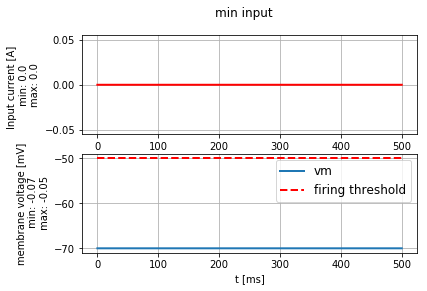

In [11]:
plot_ficurve(0 * b2.nA)

nr of spikes: 0


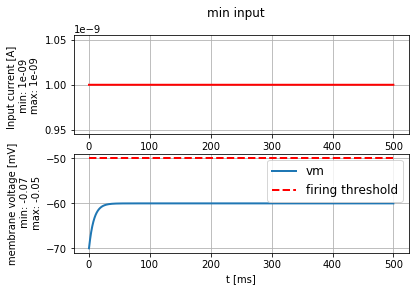

In [12]:
plot_ficurve(1 * b2.nA)

nr of spikes: 48


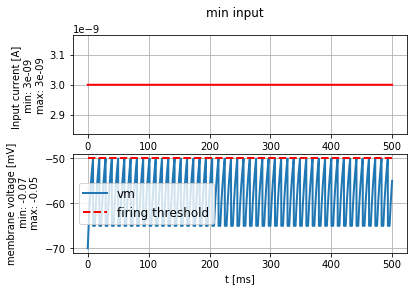

In [13]:
plot_ficurve(3 * b2.nA)

nr of spikes: 116


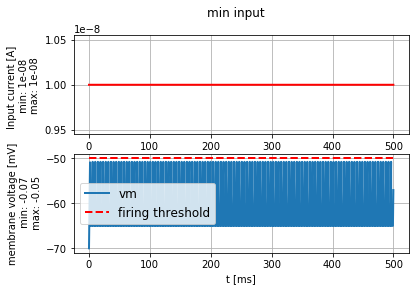

In [14]:
plot_ficurve(10 * b2.nA)

In [15]:
def get_spikes(i, time=500, refractory_period=3 * b2.ms):
    step_current = input_factory.get_step_current(t_start=0, t_end=time, unit_time=b2.ms, amplitude= i) 
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(
        input_current=step_current, simulation_time=time * b2.ms, abs_refractory_period=refractory_period)
    return spike_monitor.count[0]

In [16]:
?spike_monitor

In [17]:
samples = range(0, 101, 2)
spikes_count = []

for i in list(samples) :
    spikes = get_spikes(i * b2.nA)
    spikes_count.append(spikes) 

In [18]:
print(spikes_count)

[0, 0, 67, 91, 106, 116, 122, 128, 132, 135, 139, 143, 143, 147, 147, 147, 152, 152, 152, 152, 152, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162]


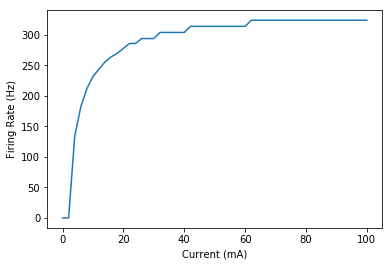

In [19]:
firing_rate = [i/0.5 for i in spikes_count] # sim time is 500ms, freq is how many spikes in a second(Hz).
plt.figure()
plt.plot(samples, firing_rate)
plt.xlabel('Current (mA)')
plt.ylabel('Firing Rate (Hz)')
plt.show()

## 2.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron
A LIF neuron is determined by the following parameters: Resting potential, Reset voltage, Firing threshold, Membrane resistance, Membrane time-scale, Absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), you can determine the neuron properties from the voltage response.

### 2.3.1. Question: “Read” the LIF parameters out of the vm plot
1. Get a random parameter set
2. Create an input current of your choice.
3. Simulate the LIF neuron using the random parameters and your test-current. Note that the simulation runs for a fixed duration of 50ms.
4. Plot the membrane voltage and estimate the parameters. You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the Membrane resistance and the Membrane time-scale you might have to change your current.
5. compare your estimates with the true values.

Again, you do not have to write much code. Use the helper functions:

(<matplotlib.axes._subplots.AxesSubplot at 0xb4ba240>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb806a90>)

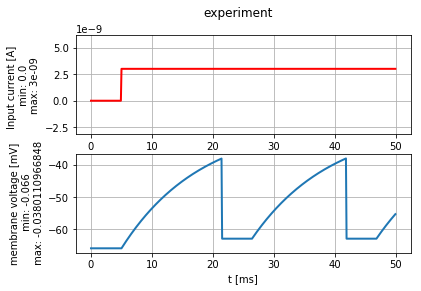

In [20]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=5, t_end=50, unit_time=b2.ms, amplitude= 3 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

In [21]:
# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -0.066
Reset voltage: -0.063
Firing threshold: -0.038
Membrane resistance: 13000000.0
Membrane time-scale: 0.013
Absolute refractory period: 0.005


## 2.4. Exercise: Sinusoidal input current and subthreshold response
In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.

### 2.4.1. Question
Create a sinusoidal input current (see example below) and inject it into the LIF neuron. Determine the phase and amplitude of the membrane voltage.

nr of spikes: 0


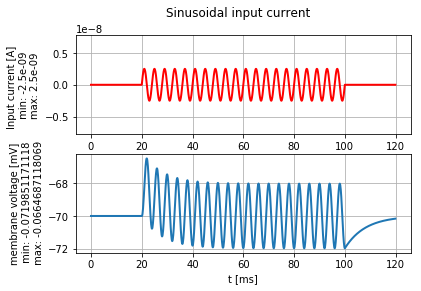

In [22]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [23]:
?input_factory.get_sinusoidal_current

In [24]:
LIF.print_default_parameters()

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [25]:
amplitude= 2.5 * b2.namp
v_rest = -70* b2.mV
v_reset = -65* b2.mV
firing_threshold = -50* b2.mV
resistance = 10. * b2.Mohm

v = amplitude * resistance
print(v_rest + v)

-45. mV


我们发现，如果说input是step current，那么能到-45mv。但是这个到不了那么多，大概只有不到65mv，因为电流的时间不够。如果我们对这个正弦电流的半个周期积分一下，看看结果。

In [26]:
amp = 2.5
freq = 250.0
T =1.0 / freq
w = 2*np.pi / T
q = -2.5 * 1/w * np.cos(w * T/2)
v_max = q/T*b2.namp * resistance
print(v_rest + v_max)

-66.02112642 mV


但因为后面还有一个负电流，所以更是到不了个半个周期的电压。

In [27]:
state_monitor.get_states()

{'N': array(1200),
 't': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.197e+02, 1.198e+02,
        1.199e+02]) * msecond,
 'v': array([[-70.        ],
        [-70.        ],
        [-70.        ],
        ...,
        [-70.16917492],
        [-70.16707339],
        [-70.16499797]]) * mvolt}

In [28]:
# from eyeballing, i can use the minimun of the voltage to find the amplitude of voltage
v_list = state_monitor.get_states('v').values()
v_amp = abs(np.min(v_list) * 1e3 * b2.mV - v_rest)
v_amp

1.98511711 * mvolt

In [29]:
# use max and min to find freq
v_arr = np.array(v_list[0][200:1000])
count = 0
max_idx = []
max_val = []
min_idx = []
min_val = []
for i in range(1, 799):
    if (v_arr[i] > v_arr[i-1]) and (v_arr[i] > v_arr[i+1]):
        max_idx.append(i)
        max_val.append(v_arr[i])
    elif (v_arr[i] < v_arr[i-1]) and (v_arr[i] < v_arr[i+1]):
        min_val.append(v_arr[i])

In [30]:
print(max_idx)

[20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780]


In [31]:
print(min_idx)

[]


In [32]:
# T/2 = 0.02 * 0.1
T = 0.002 * 2
F = 1/T
F

250.0

In [33]:
v_amp = (np.mean(max_val) - np.mean(min_val)) / 2 * 1000 * b2.mV
v_amp 

2.00291151 * mvolt

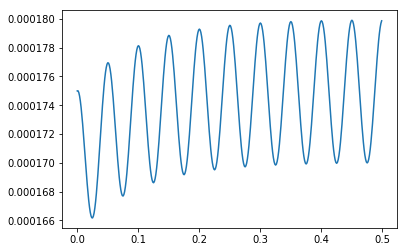

In [34]:
# use fourier amplitude spectrum
n_samples = 800

v_arr = np.array(v_list[0][200:1000])
np_fft = np.fft.fft(v_arr)
amplitudes = 2.0/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(n_samples)


plt.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
plt.show()

In [35]:
amp = [i[0] for i in amplitudes.tolist()]
max(set(amp), key=amp.count)

0.00017500000000000003

In [36]:
# count the number of point closest to resting voltage in vicinity
v_arr = np.array(v_list[0][200:1000])
count = 0
loc = []
for i in range(1, 799):
    if abs(v_arr[i] + 0.07) < 0.001:
        if (abs(v_arr[i] + 0.07) < abs(v_arr[i-1] + 0.07)) and (abs(v_arr[i] + 0.07) < abs(v_arr[i+1] + 0.07)):
            count += 1
            loc.append(i)
count

39

In [37]:
# get the freq
sample_freq = (count/2 + 1) / 0.08
sample_freq

250.0

In [38]:
print(loc)

[35, 46, 73, 88, 112, 129, 151, 169, 191, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790]


结合图片，肉眼观察发现电压的相位比电流慢1ms，是周期的1/4。电流的相位是0
电压的相位：Phase = pi/4

### 2.4.2. Question
For input frequencies between 10Hz and 1kHz, plot the resulting amplitude of subthreshold oscillations of the membrane potential vs. input frequency.

### 2.4.3. Question
For input frequencies between 10Hz and 1kHz, plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency.

In [39]:
# helper function
from scipy import signal

def get_state_from_sin(input_frequency):
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=input_frequency*b2.Hz, direct_current=0. * b2.namp)
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    return sinusoidal_current, state_monitor

def get_amp(state):
    v_list = state.get_states('v').values()
    v_arr = np.array(v_list[0][200:1000])
    count = 0
    max_val = []
    min_val = []
    for i in range(1, 799):
        if (v_arr[i] > v_arr[i-1]) and (v_arr[i] > v_arr[i+1]):
            max_val.append(v_arr[i])
        elif (v_arr[i] < v_arr[i-1]) and (v_arr[i] < v_arr[i+1]):
            min_val.append(v_arr[i])

    if len(min_val) == 0:
        amp =  (np.mean(max_val) - np.mean(min_val)) * 1000 * b2.mV
    else:
        amp = (np.mean(max_val) - np.mean(min_val)) / 2 * 1000 * b2.mV
        
    return amp

def find_phase_shift(a, b):
    shift = np.argmax(signal.correlate(a, b))
    signal_length = len(a) - 1
    phase_shift = shift - signal_length 
    return phase_shift

In [40]:
# test run on example
a = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])
print('Phase shift: %.2f' % find_phase_shift(a, b))

Phase shift: -4.00


In [41]:
frequency_list = np.linspace(10, 1000, 50)
voltage_list = []
phase_shift_list = []

for freq in frequency_list:
    current, state = get_state_from_sin(freq)
    voltage = get_amp(state)
    voltage_list.append(voltage)
    phase_shift = find_phase_shift(np.squeeze(current.values[1:1001]), np.array(state_monitor.v[0])[0:1000])
    phase_shift_list.append(phase_shift)

WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
 [py.warnings]
WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]


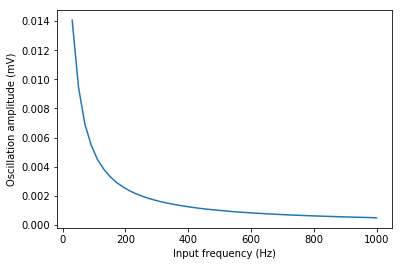

In [42]:
plt.plot(frequency_list, voltage_list)
plt.xlabel('Input frequency (Hz)')
plt.ylabel('Oscillation amplitude (mV)')
plt.show()

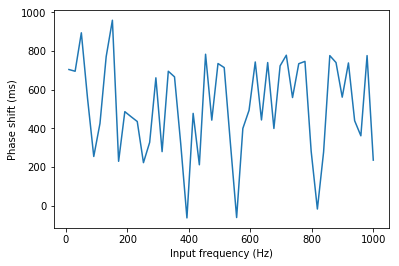

In [43]:
plt.plot(frequency_list, phase_shift_list)
plt.ylabel('Phase shift (ms)')
plt.xlabel('Input frequency (Hz)')
plt.show()

### 2.4.4. Question
To what type of filter (High-Pass, Low-Pass) does this correspond?